# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [3]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

# From AMSOS_analysis.py
import amsos_analysis as aa
from amsos_analysis.colormaps import register_cmaps

# Locations
ws_path = Path('/home/alamson/DATA/Chromatin/')
mnt_path = Path.home() / 'projects/DATA/Chromatin/'
ceph_path = Path.home() / 'ceph/DATA/Chromatin/'

### Style settings

In [4]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)

register_cmaps()
#plt.rcParams['image.cmap'] = 'emct8'
#plt.rcParams['image.cmap'] = 'warm'
plt.rcParams['image.cmap'] = 'YlOrRd'
#plt.rcParams['image.cmap'] = 'twilight'
#plt.rcParams['image.cmap'] = 'coolwarm'
#plt.rcParams['image.cmap'] = 'RdYlBu_r'
        

# Functions

# End tensions

/tmp/ipykernel_1529818/2337929544.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_data = h5py.File(next(data_path.glob('*/*.h5')))


0.4972479937009967
0.32128697066338974


Text(0.5, 1.0, 'First spring')

Text(0.5, 1.0, 'Second spring')

Text(0.5, 1.0, 'Last spring')

Text(0.5, 1.0, 'Second-to-last spring')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0.98, 'No crosslinkers')

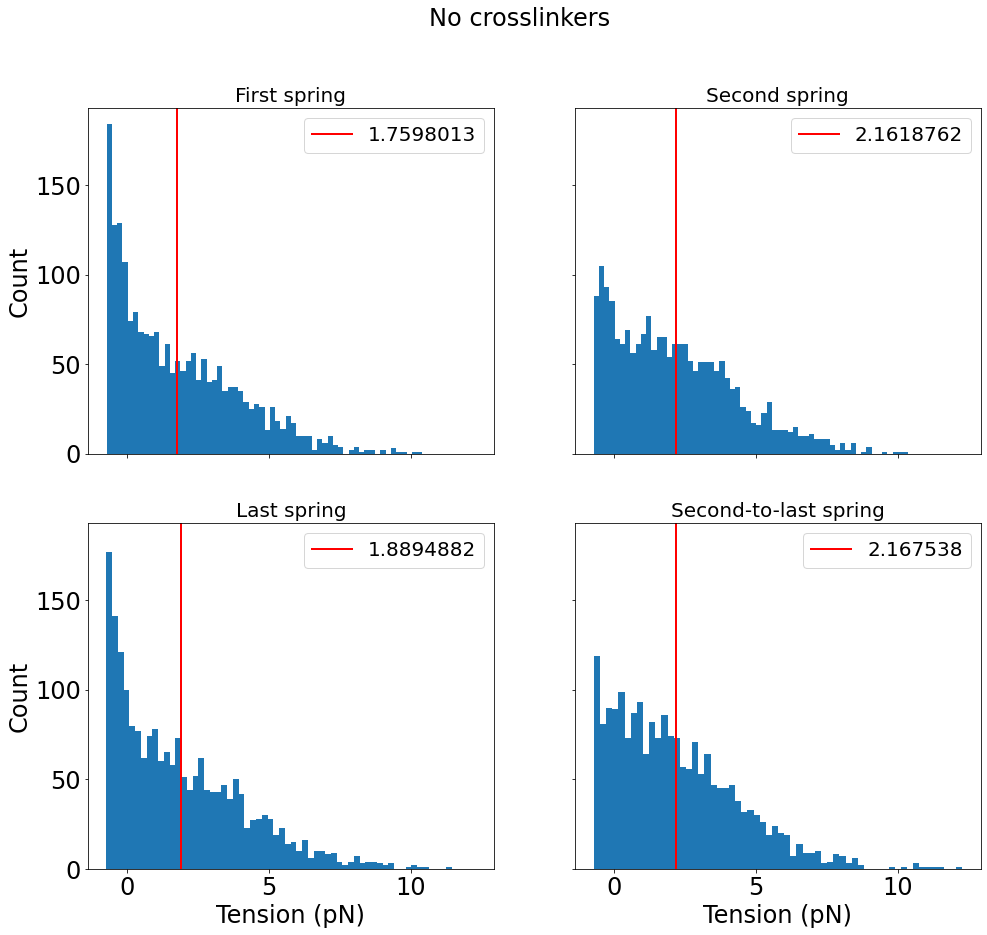

In [84]:
data_path = ws_path / "21-11-09_aLchr1_line700_3umconf_eq10min"
ss_ind = 4000
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,14))

avg_cond_num = None
avg_max_width = None
avg_total_bead = None
num_seeds = 0.
h5_data_lst = []

try:
    h5_data = h5py.File(next(data_path.glob('*/*.h5')))
    
    
    time_arr = h5_data['time'][ss_ind:-1]
    #print(time_arr.shape)
        
    tension_arr0 = aa.get_link_tension(h5_data)[0, ss_ind:-1]
    tension_arr1 = aa.get_link_tension(h5_data)[1, ss_ind:-1]
    me, seme, kbt, expte = aa.get_link_energy_arrays(h5_data)
    print(expte/kbt)
    print(me[ss_ind:-1].mean()/kbt)

    
    tension_arr_1 = aa.get_link_tension(h5_data)[-1, ss_ind:-1]
    tension_arr_2 = aa.get_link_tension(h5_data)[-2, ss_ind:-1]

    
    _ = axarr[0,0].hist(tension_arr0, bins=60)
    _ = axarr[0,0].axvline(tension_arr0.mean(), color='r', label=tension_arr0.mean())
    _ = axarr[0,1].hist(tension_arr1, bins=60)
    _ = axarr[0,1].axvline(tension_arr1.mean(), color='r', label=tension_arr1.mean())

    _ = axarr[1,0].hist(tension_arr_1, bins=60)
    _ = axarr[1,0].axvline(tension_arr_1.mean(), color='r', label=tension_arr_1.mean())
    _ = axarr[1,1].hist(tension_arr_2, bins=60)
    _ = axarr[1,1].axvline(tension_arr_2.mean(), color='r', label=tension_arr_2.mean())

    #axarr[0,1].sharey(axarr[0,0])
    axarr[0,0].set_title('First spring')
    axarr[0,1].set_title('Second spring')
    axarr[1,0].set_title('Last spring')
    axarr[1,1].set_title('Second-to-last spring')
    
    
    axarr[0,0].set_ylabel('Count')
    axarr[1,0].set_ylabel('Count')
    axarr[1,0].set_xlabel('Tension (pN)')
    axarr[1,1].set_xlabel('Tension (pN)')
    
    fig.suptitle('No crosslinkers')
    
    for ax in axarr.flatten():
        ax.legend()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_1529818/1604662807.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_data = h5py.File(next(data_path.glob('*/*.h5')))


(2001,)
0.4972479937009967
0.29562481332325585


Text(0.5, 1.0, 'First spring')

Text(0.5, 1.0, 'Second spring')

Text(0.5, 1.0, 'Last spring')

Text(0.5, 1.0, 'Second-to-last spring')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0.98, 'With crosslinkers')

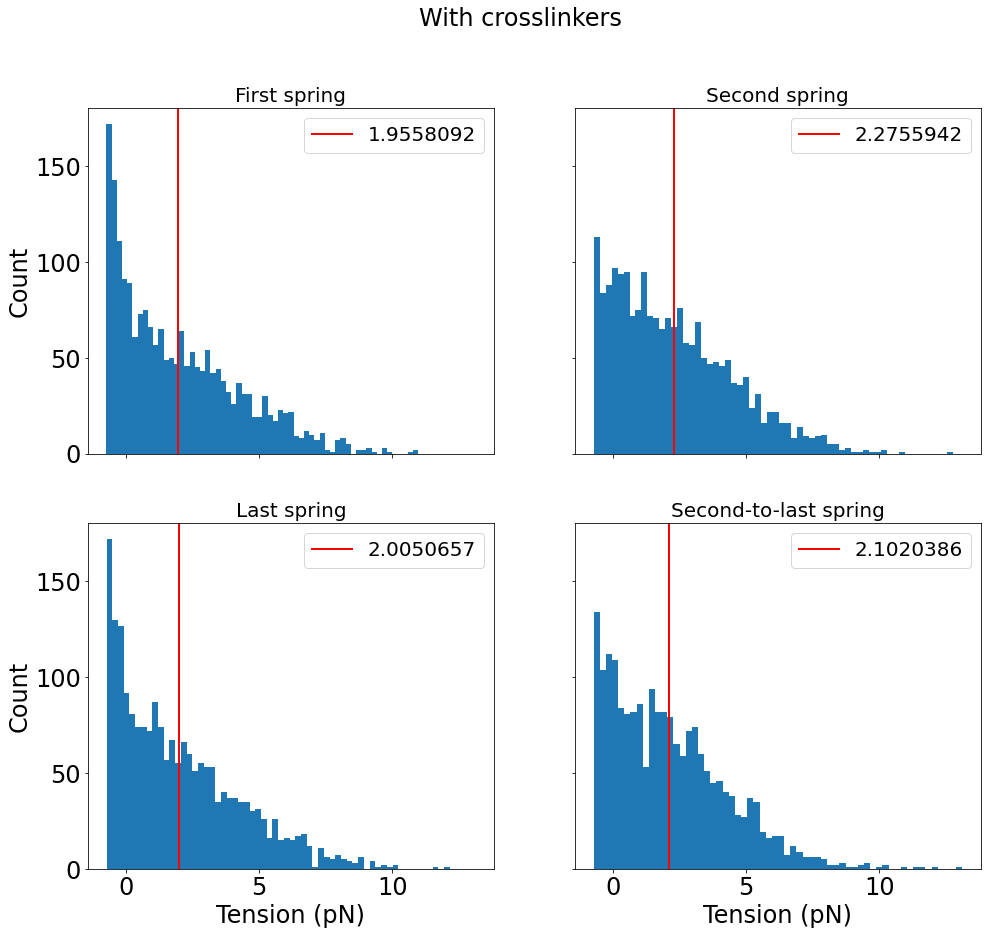

In [83]:
data_path = ceph_path / "21-12-05_aLchr1_scan.12_line700_2xsticky_3umconf/simulations/s1"
ss_ind = 4000
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,14))

avg_cond_num = None
avg_max_width = None
avg_total_bead = None
num_seeds = 0.
h5_data_lst = []

try:
    h5_data = h5py.File(next(data_path.glob('*/*.h5')))
    
    time_arr = h5_data['time'][ss_ind:-1]
    print(time_arr.shape)
    me, seme, kbt, expte = aa.get_link_energy_arrays(h5_data)
    print(expte/kbt)
    print(me[ss_ind:-1].mean()/kbt)
        
    tension_arr0 = aa.get_link_tension(h5_data)[0, ss_ind:-1]
    tension_arr1 = aa.get_link_tension(h5_data)[1, ss_ind:-1]
    tension_arr_1 = aa.get_link_tension(h5_data)[-1, ss_ind:-1]
    tension_arr_2 = aa.get_link_tension(h5_data)[-2, ss_ind:-1]

    
    _ = axarr[0,0].hist(tension_arr0, bins=60)
    _ = axarr[0,0].axvline(tension_arr0.mean(), color='r', label=tension_arr0.mean())
    _ = axarr[0,1].hist(tension_arr1, bins=60)
    _ = axarr[0,1].axvline(tension_arr1.mean(), color='r', label=tension_arr1.mean())

    _ = axarr[1,0].hist(tension_arr_1, bins=60)
    _ = axarr[1,0].axvline(tension_arr_1.mean(), color='r', label=tension_arr_1.mean())
    _ = axarr[1,1].hist(tension_arr_2, bins=60)
    _ = axarr[1,1].axvline(tension_arr_2.mean(), color='r', label=tension_arr_2.mean())

    #axarr[0,1].sharey(axarr[0,0])
    axarr[0,0].set_title('First spring')
    axarr[0,1].set_title('Second spring')
    axarr[1,0].set_title('Last spring')
    axarr[1,1].set_title('Second-to-last spring')
    
    
    axarr[0,0].set_ylabel('Count')
    axarr[1,0].set_ylabel('Count')
    axarr[1,0].set_xlabel('Tension (pN)')
    axarr[1,1].set_xlabel('Tension (pN)')
    
    fig.suptitle('With crosslinkers')
    
    for ax in axarr.flatten():
        ax.legend()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_1529818/3884767237.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_data = h5py.File(next(data_path.glob('*/*.h5')))


(2001,)


Text(0.5, 1.0, 'First spring')

Text(0.5, 1.0, 'Second spring')

Text(0.5, 1.0, 'Last spring')

Text(0.5, 1.0, 'Second-to-last spring')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0.98, 'No crosslinkers')

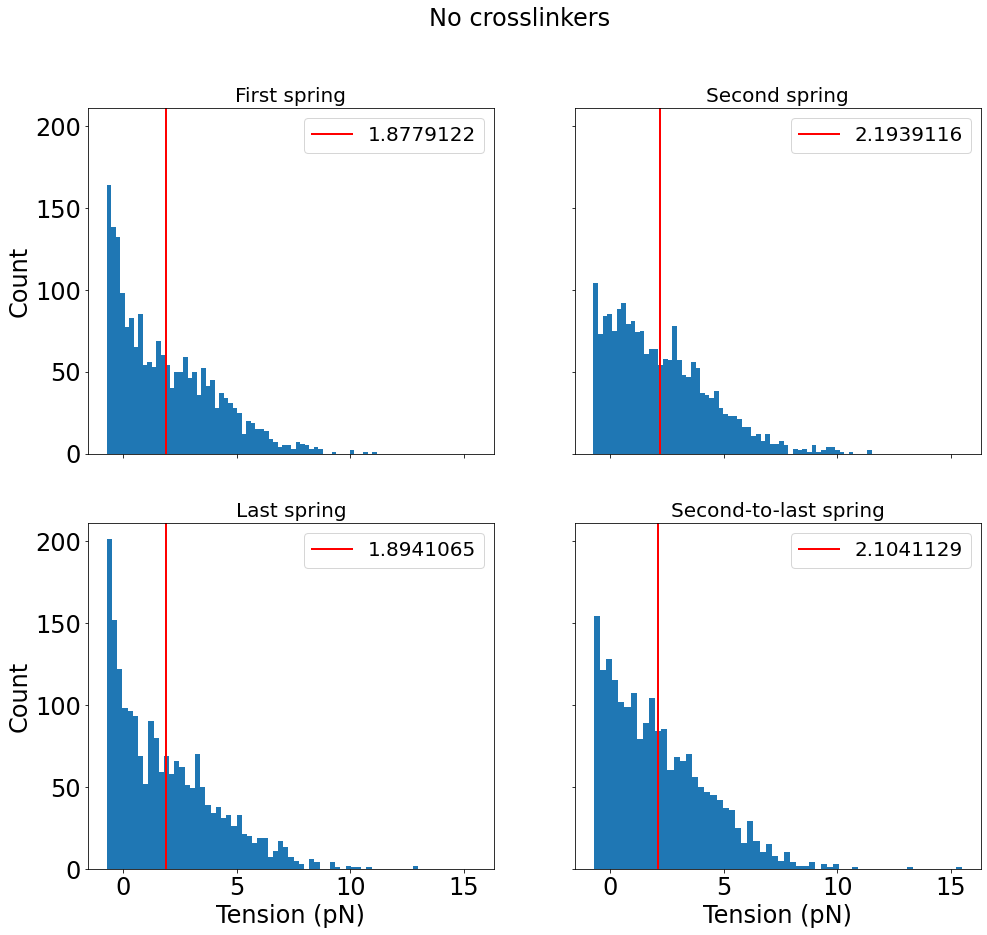

In [72]:
data_path = ws_path / "21-11-09_aLchr1_line700_5umconf_eq10min"
ss_ind = 4000
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,14))

avg_cond_num = None
avg_max_width = None
avg_total_bead = None
num_seeds = 0.
h5_data_lst = []

try:
    h5_data = h5py.File(next(data_path.glob('*/*.h5')))
    
    time_arr = h5_data['time'][ss_ind:-1]
    print(time_arr.shape)
        
    tension_arr0 = aa.get_link_tension(h5_data)[0, ss_ind:-1]
    tension_arr1 = aa.get_link_tension(h5_data)[1, ss_ind:-1]
    tension_arr_1 = aa.get_link_tension(h5_data)[-1, ss_ind:-1]
    tension_arr_2 = aa.get_link_tension(h5_data)[-2, ss_ind:-1]

    
    _ = axarr[0,0].hist(tension_arr0, bins=60)
    _ = axarr[0,0].axvline(tension_arr0.mean(), color='r', label=tension_arr0.mean())
    _ = axarr[0,1].hist(tension_arr1, bins=60)
    _ = axarr[0,1].axvline(tension_arr1.mean(), color='r', label=tension_arr1.mean())

    _ = axarr[1,0].hist(tension_arr_1, bins=60)
    _ = axarr[1,0].axvline(tension_arr_1.mean(), color='r', label=tension_arr_1.mean())
    _ = axarr[1,1].hist(tension_arr_2, bins=60)
    _ = axarr[1,1].axvline(tension_arr_2.mean(), color='r', label=tension_arr_2.mean())

    #axarr[0,1].sharey(axarr[0,0])
    axarr[0,0].set_title('First spring')
    axarr[0,1].set_title('Second spring')
    axarr[1,0].set_title('Last spring')
    axarr[1,1].set_title('Second-to-last spring')
    
    
    axarr[0,0].set_ylabel('Count')
    axarr[1,0].set_ylabel('Count')
    axarr[1,0].set_xlabel('Tension (pN)')
    axarr[1,1].set_xlabel('Tension (pN)')
    
    fig.suptitle('No crosslinkers')
    
    for ax in axarr.flatten():
        ax.legend()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_344328/3485304146.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_data = h5py.File(next(data_path.glob('*/*.h5')))


(2001,)


Text(0.5, 1.0, 'First spring')

Text(0.5, 1.0, 'Second spring')

Text(0.5, 1.0, 'Last spring')

Text(0.5, 1.0, 'Second-to-last spring')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0.98, 'With crosslinkers')

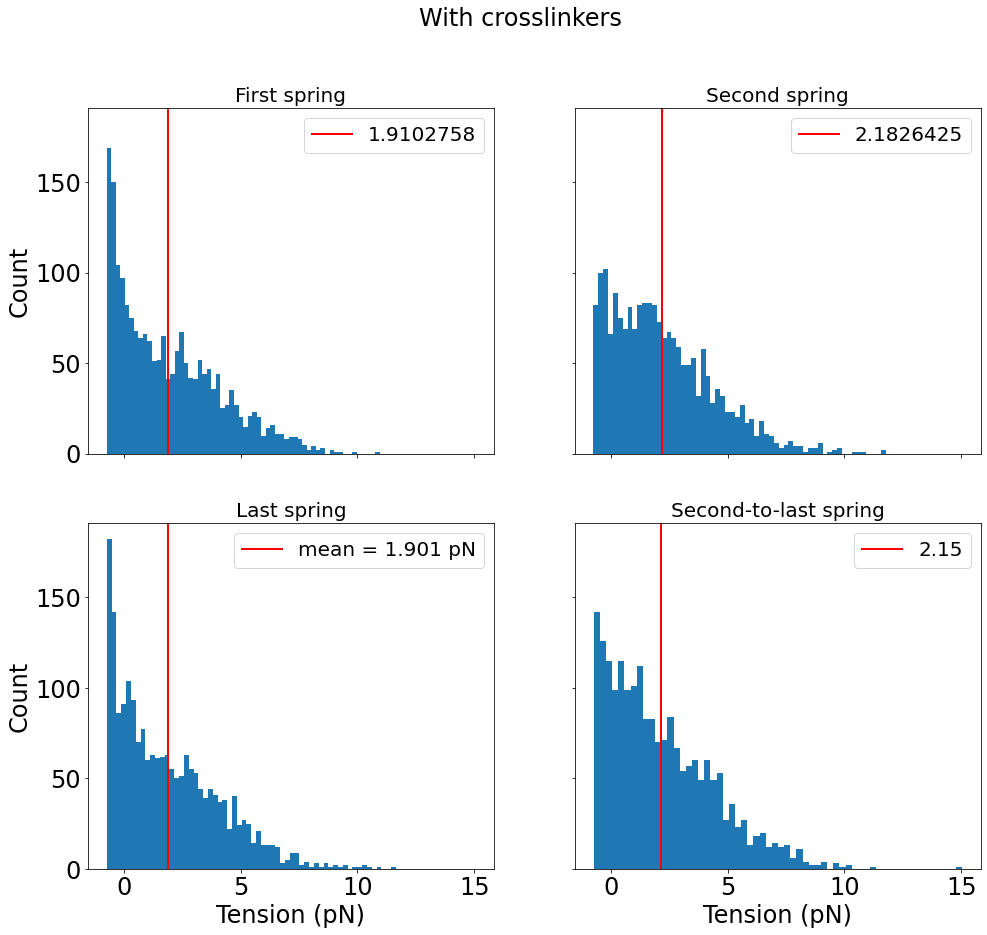

In [76]:
data_path = ceph_path / "21-12-05_aLchr1_scan.12_line700_2xsticky_5umconf/simulations/s1"
ss_ind = 4000
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,14))

avg_cond_num = None
avg_max_width = None
avg_total_bead = None
num_seeds = 0.
h5_data_lst = []

try:
    h5_data = h5py.File(next(data_path.glob('*/*.h5')))
    
    time_arr = h5_data['time'][ss_ind:-1]
    print(time_arr.shape)
        
    tension_arr0 = aa.get_link_tension(h5_data)[0, ss_ind:-1]
    tension_arr1 = aa.get_link_tension(h5_data)[1, ss_ind:-1]
    tension_arr_1 = aa.get_link_tension(h5_data)[-1, ss_ind:-1]
    tension_arr_2 = aa.get_link_tension(h5_data)[-2, ss_ind:-1]

    
    _ = axarr[0,0].hist(tension_arr0, bins=60)
    _ = axarr[0,0].axvline(tension_arr0.mean(), color='r', label=tension_arr0.mean())
    _ = axarr[0,1].hist(tension_arr1, bins=60)
    _ = axarr[0,1].axvline(tension_arr1.mean(), color='r', label=tension_arr1.mean())

    _ = axarr[1,0].hist(tension_arr_1, bins=60)
    _ = axarr[1,0].axvline(tension_arr_1.mean(), color='r', label='mean = {:.4g} pN'.format(tension_arr_1.mean()))
    _ = axarr[1,1].hist(tension_arr_2, bins=60)
    _ = axarr[1,1].axvline(tension_arr_2.mean(), color='r', label=f'{tension_arr_2.mean():.3g}')

    #axarr[0,1].sharey(axarr[0,0])
    axarr[0,0].set_title('First spring')
    axarr[0,1].set_title('Second spring')
    axarr[1,0].set_title('Last spring')
    axarr[1,1].set_title('Second-to-last spring')
    
    
    axarr[0,0].set_ylabel('Count')
    axarr[1,0].set_ylabel('Count')
    axarr[1,0].set_xlabel('Tension (pN)')
    axarr[1,1].set_xlabel('Tension (pN)')
    
    fig.suptitle('With crosslinkers')
    
    for ax in axarr.flatten():
        ax.legend()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_1529818/3361257436.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_data = h5py.File(next(data_path.glob('*/*.h5')))


(2400,)


Text(0.5, 1.0, 'First spring')

Text(0.5, 1.0, 'Second spring')

Text(0.5, 1.0, 'Last spring')

Text(0.5, 1.0, 'Second-to-last spring')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0, 'Tension (pN)')

Text(0.5, 0.98, 'With crosslinkers')

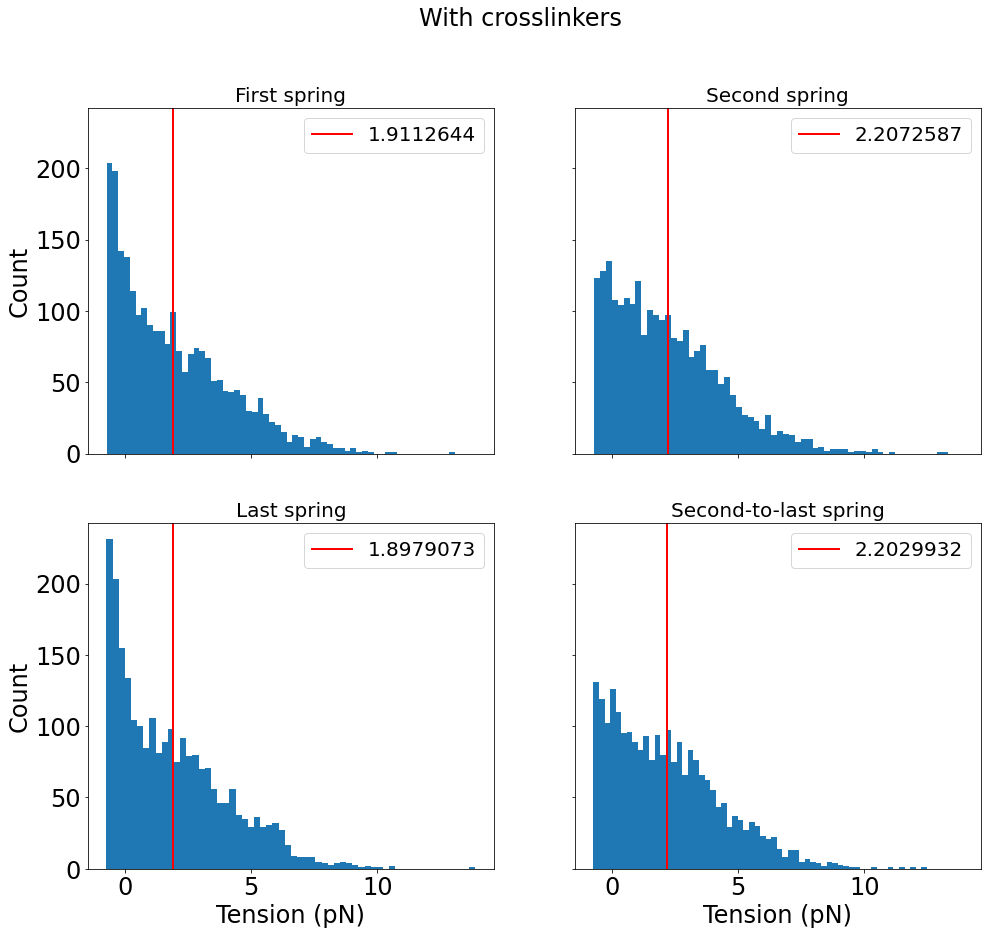

In [86]:
data_path = ceph_path / "22-01-10_aLchr1_scan.12_line700_2xsticky_4umconf_eq/simulations/s1"
ss_ind = 1
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,14))

avg_cond_num = None
avg_max_width = None
avg_total_bead = None
num_seeds = 0.
h5_data_lst = []

try:
    h5_data = h5py.File(next(data_path.glob('*/*.h5')))
    
    time_arr = h5_data['time'][ss_ind:-1]
    print(time_arr.shape)
        
    tension_arr0 = aa.get_link_tension(h5_data)[0, ss_ind:-1]
    tension_arr1 = aa.get_link_tension(h5_data)[1, ss_ind:-1]
    tension_arr_1 = aa.get_link_tension(h5_data)[-1, ss_ind:-1]
    tension_arr_2 = aa.get_link_tension(h5_data)[-2, ss_ind:-1]

    
    _ = axarr[0,0].hist(tension_arr0, bins=60)
    _ = axarr[0,0].axvline(tension_arr0.mean(), color='r', label=tension_arr0.mean())
    _ = axarr[0,1].hist(tension_arr1, bins=60)
    _ = axarr[0,1].axvline(tension_arr1.mean(), color='r', label=tension_arr1.mean())

    _ = axarr[1,0].hist(tension_arr_1, bins=60)
    _ = axarr[1,0].axvline(tension_arr_1.mean(), color='r', label=tension_arr_1.mean())
    _ = axarr[1,1].hist(tension_arr_2, bins=60)
    _ = axarr[1,1].axvline(tension_arr_2.mean(), color='r', label=tension_arr_2.mean())

    #axarr[0,1].sharey(axarr[0,0])
    axarr[0,0].set_title('First spring')
    axarr[0,1].set_title('Second spring')
    axarr[1,0].set_title('Last spring')
    axarr[1,1].set_title('Second-to-last spring')
    
    
    axarr[0,0].set_ylabel('Count')
    axarr[1,0].set_ylabel('Count')
    axarr[1,0].set_xlabel('Tension (pN)')
    axarr[1,1].set_xlabel('Tension (pN)')
    
    fig.suptitle('With crosslinkers')
    
    for ax in axarr.flatten():
        ax.legend()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

# Conclusions and Next Steps